In [1]:
import networkx as nx
import networkit as nk

from pathlib import Path
from panricci import RicciFlow
from panricci.distributions.variation_graph import DistributionNodes
# from panricci.distributions.sequence_graph import DistributionNodes
from panricci.utils import GFALoader

In [2]:
dirsave_graphs = None

In [20]:
# DATA:
# path_gfa = "../data/test1.gfa"
# path_chkpt = "../output/test3/ricci-flow/test3-ricciflow-5.edgelist"

# path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha1/DQA1-3117.gfa"
# path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha1-ricciflow-5.edgelist"

path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha10/DQA1-3117.gfa"
path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha10-ricciflow-5.edgelist"



___
## Apply Ricci-Flow to a Variation Graph

In [14]:
# load graph
gfa_loader = GFALoader(undirected=False)
G = gfa_loader(path_gfa)

# compute distribution of nodes
distribution = DistributionNodes(G, alpha=0.5)

# Initialize ricci-flow
ricci_flow = RicciFlow(G, distribution, dirsave_graphs=dirsave_graphs)
G_ricci = ricci_flow.run(iterations=100, save_last=False, save_intermediate_graphs=False, name=Path(path_gfa).stem)

RicciFlow:  90%|█████████ | 90/100 [00:32<00:03,  2.80it/s]

Stopping Ricci-Flow in iteration 90, all curvatures below tol=1e-11


In [16]:
G_ricci.edges.data()

OutEdgeDataView([('1', '656', {'curvature': 0.0, 'weight': 0.5}), ('2', '457', {'curvature': 0.0, 'weight': 0.4836802956738759}), ('3', '252', {'curvature': 0.0, 'weight': 0.5}), ('3', '241', {'curvature': 0.0, 'weight': 0.5}), ('4', '197', {'curvature': 0.0, 'weight': 0.5}), ('5', '197', {'curvature': 0.0, 'weight': 0.5}), ('6', '190', {'curvature': 0.0, 'weight': 0.5}), ('7', '542', {'curvature': 0.0, 'weight': 0.5}), ('8', '10', {'curvature': 0.0, 'weight': 0.5}), ('9', '10', {'curvature': 0.0, 'weight': 0.5}), ('10', '389', {'curvature': 0.0, 'weight': 0.5}), ('10', '11', {'curvature': 0.0, 'weight': 0.5}), ('10', '291', {'curvature': 0.0, 'weight': 0.5}), ('11', '661', {'curvature': 0.0, 'weight': 0.5}), ('12', '528', {'curvature': 0.0, 'weight': 0.5}), ('13', '371', {'curvature': 0.0, 'weight': 0.5}), ('13', '509', {'curvature': 0.0, 'weight': 0.5}), ('13', '14', {'curvature': 0.0, 'weight': 0.5}), ('14', '339', {'curvature': 0.0, 'weight': 0.5}), ('15', '393', {'curvature': 0.0,

____
## plot embeddings


<Axes: xlabel='from_source', ylabel='to_sink'>

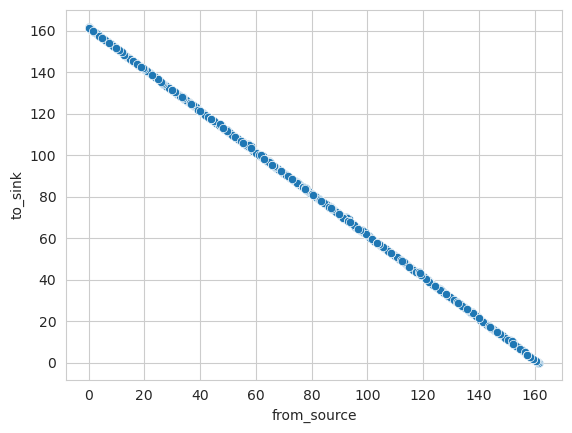

In [17]:
import seaborn as sns
import pandas as pd
from panricci.alignment.node_embeddings import NodeEmbeddings

compute_node_embeddings = NodeEmbeddings(
                                        ricci_embedding=True, # two coordinates considering shortest path [d(source, node),d(node,sink)]  
                                        seq_embedding=False   # 2 x 4^k coordinates, k-mer distributions for sequence spelled by the shortest paths between (source,node) and (node,sink) 
                                        )
node_emb = compute_node_embeddings(G_ricci)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="from_source",y="to_sink",)

___

## Results

**Checkpoints can be loaded**

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
G_chkpt = gfa_loader(path_gfa, path_chkpt)

<Axes: xlabel='to_sink', ylabel='from_source'>

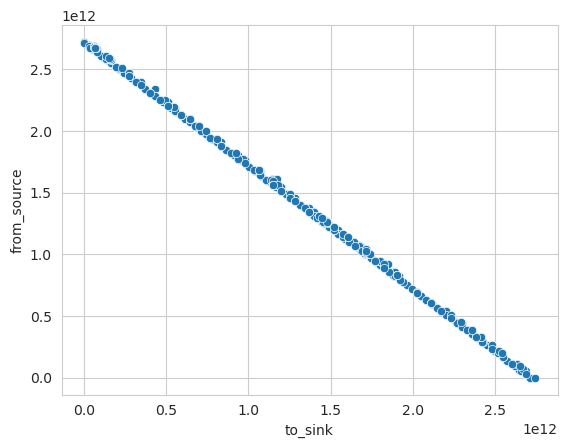

In [23]:
node_emb = compute_node_embeddings(G_chkpt)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="to_sink",y="from_source",)

In [11]:
# Cluster coordinates using DBSCAN
X = coords
clustering = DBSCAN(eps=1.5, min_samples=5).fit(X)
coords["cluster"] = clustering.labels_
coords.reset_index(names="node", inplace=True)
# coords.to_csv("alpha50-labels.csv")

<Axes: xlabel='to_sink', ylabel='from_source'>

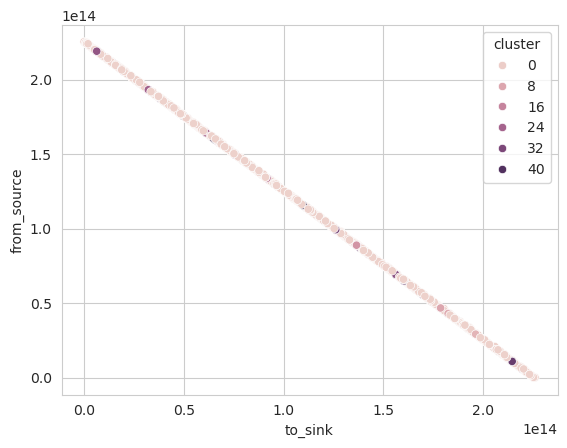

In [12]:
sns.scatterplot(coords, x="to_sink",y="from_source", hue="cluster")

In [ ]:
coords.sort_values(by="cluster")